# global_power_plant_electricity_generation exploration
## by Gladens Popoola

## Introduction
> The Global Power Plant Database is an open-source open-access dataset of grid-scale (1 MW and greater) electricity generating facilities operating across the world. There are 34936 power plants in the dataset with 36 features
- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
power_plant = pd.read_csv('global_power_plant_database.csv')
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
power_plant.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34935,ZWE,Zimbabwe,Kariba Dam South Hydroelectric Power Station Z...,GEODB0003803,750.0,-16.5222,28.7619,Hydro,NaN,NaN,...,3999.75,3999.75,3745.02,3428.65,3960.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
print(power_plant.shape)
print(power_plant.dtypes)
print(power_plant.describe())

(34936, 36)
country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018   

For my analysis, I'll be focusing on the generation and estimated generation for the year 2017 alone so I'll be making use of the following columns: country_long, name, capacity_mw, primary fuel, generation_gwh_2017, and estimated_generation_gwh_2017. Hence, I will create a new dataframe called power_plant_2017 containing these columns only and then do some data cleaning.

In [5]:
power_plant_2017 = power_plant[['country_long', 'name', 'capacity_mw', 'primary_fuel', 'generation_gwh_2017', 
                                'estimated_generation_gwh_2017']]
power_plant_2017.head()

,country_long,name,capacity_mw,primary_fuel,generation_gwh_2017,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,NaN,119.50
1,Afghanistan,Kandahar DOG,10.0,Solar,NaN,18.29
2,Afghanistan,Kandahar JOL,10.0,Solar,NaN,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,NaN,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,NaN,350.80


In [6]:
 power_plant_2017.rename(columns={'country_long': 'country', 'name': 'powerplant_name'}, inplace=True)

In [7]:
power_plant_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        34936 non-null  object 
 1   powerplant_name                34936 non-null  object 
 2   capacity_mw                    34936 non-null  float64
 3   primary_fuel                   34936 non-null  object 
 4   generation_gwh_2017            9500 non-null   float64
 5   estimated_generation_gwh_2017  33138 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [8]:
power_plant_2017.isnull().sum()

country                              0
powerplant_name                      0
capacity_mw                          0
primary_fuel                         0
generation_gwh_2017              25436
estimated_generation_gwh_2017     1798
dtype: int64

Dropping missing values in the estimated_generation_gwh_2017 column.

In [9]:
null = power_plant_2017[power_plant_2017.estimated_generation_gwh_2017.isnull()]
idx = list(null.index)
power_plant_2017 = power_plant_2017.drop(idx)

In [10]:
power_plant_2017.isnull().sum()

country                              0
powerplant_name                      0
capacity_mw                          0
primary_fuel                         0
generation_gwh_2017              23897
estimated_generation_gwh_2017        0
dtype: int64

In [11]:
power_plant_2017.generation_gwh_2017.describe()

count     9241.000000
mean       675.845949
std       2399.634705
min       -934.944000
25%          2.552000
50%         18.273000
75%        214.578000
max      36448.643000
Name: generation_gwh_2017, dtype: float64

Dropping negative values in the generation_gwh_2017 column.

In [12]:
negative = power_plant_2017[power_plant_2017.generation_gwh_2017 < 0]
idx = list(negative.index)
power_plant_2017 = power_plant_2017.drop(idx)

In [13]:
power_plant_2017.generation_gwh_2017.describe()

count     9110.000000
mean       686.320231
std       2415.161284
min          0.000000
25%          2.812250
50%         19.835000
75%        224.689556
max      36448.643000
Name: generation_gwh_2017, dtype: float64

Filling in missing values in the generation_gwh_2017 column with themedian.

In [14]:
median = power_plant_2017.generation_gwh_2017.median()
median

19.835

In [15]:
power_plant_2017.fillna(median, inplace = True)

In [16]:
power_plant_2017.isnull().sum()

country                          0
powerplant_name                  0
capacity_mw                      0
primary_fuel                     0
generation_gwh_2017              0
estimated_generation_gwh_2017    0
dtype: int64

In [17]:
power_plant_2017.describe()

,capacity_mw,generation_gwh_2017,estimated_generation_gwh_2017
count,33007.000000,33007.000000,33007.000000
mean,169.883751,203.786297,717.682647
std,500.721933,1303.287617,2488.455568
min,1.000000,0.000000,0.000000
25%,5.000000,19.835000,8.210000
50%,18.000000,19.835000,37.700000
75%,81.000000,19.835000,229.660000
max,22500.000000,36448.643000,82810.770000


In [18]:
print(power_plant_2017.shape)
print(power_plant_2017.dtypes)

(33007, 6)
country                           object
powerplant_name                   object
capacity_mw                      float64
primary_fuel                      object
generation_gwh_2017              float64
estimated_generation_gwh_2017    float64
dtype: object


### What is the structure of your dataset?

> There are 34936 power plants in the dataset with 36 features(country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh_2013, estimated_generation_gwh_2014, estimated_generation_gwh_2015, estimated_generation_gwh_2016, estimated_generation_gwh_2017, estimated_generation_note_2013, estimated_generation_note_2014, estimated_generation_note_2015, estimated_generation_note_2016, estimated_generation_note_2017). For my analysis, I'll be focusing on the generation and estimated generation for the year 2017 alone so I'll be making use of the following columns: country_long, name, capacity_mw, primary_fuel, generation_gwh_2017, and estimated_generation_gwh_2017. So I created a new dataframe called power_plant_2017 containing these columns only. This dataframe contains 33007 power plants and 6 features(needed for my analysis). Of the 6 features, 3 are categorical and 3 are numerical.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in finding out what features affected electricity generation in 2017 as well as the features that influence estimated electricity generation in 2017.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that capacity of power plant should greatly influence electricity generation and estimated electricity generation. Also, I think that the type of fuel generated by the power plant may affect electricity generation as well as the country where the power plant is located though the effect may not be as much as the capacity.

## Univariate Exploration

First, let's look at what the distribution of the main variables of interest: generation_gwh_2017 and estimated_generation_gwh_2017 look like.

1. generation_gwh_2017

In [19]:
# a standard-scaled plot
def histplot(df, col, binsize):
    bins = np.arange(0, df[col].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = col, bins = bins)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

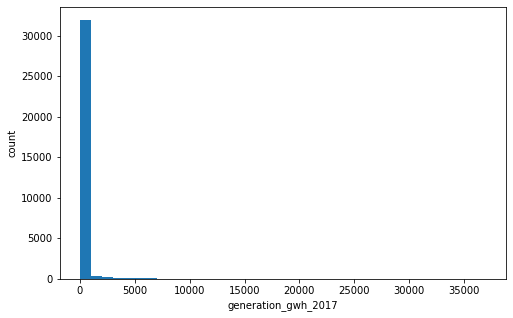

In [20]:
# start with a standard-scaled plot
histplot(power_plant_2017, 'generation_gwh_2017', 1000);

In [21]:
power_plant_2017['generation_gwh_2017'].describe()

count    33007.000000
mean       203.786297
std       1303.287617
min          0.000000
25%         19.835000
50%         19.835000
75%         19.835000
max      36448.643000
Name: generation_gwh_2017, dtype: float64

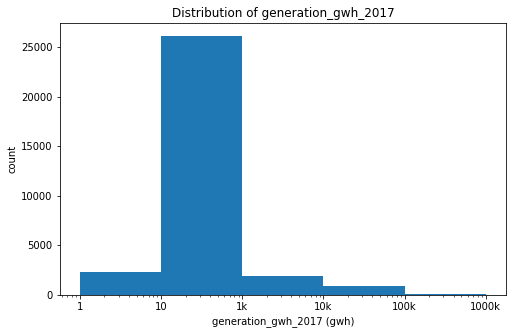

In [22]:
# there's a tail in the distribution, so let's put it on a log scale instead
log_binsize = 1.0
bins = 10 ** np.arange(0, np.log10(power_plant_2017['generation_gwh_2017'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'generation_gwh_2017', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('generation_gwh_2017 (gwh)')
plt.ylabel('count')
plt.title('Distribution of generation_gwh_2017');
plt.show()

generation_gwh_2017 has a tailed distribution, so I used a log transformation on it. Now the somewhat rightly-skewed distribution of the generation_gwh_2017 can be seen clearly as well as the fact that it is unimodal.

2. estimated_generation_gwh_2017

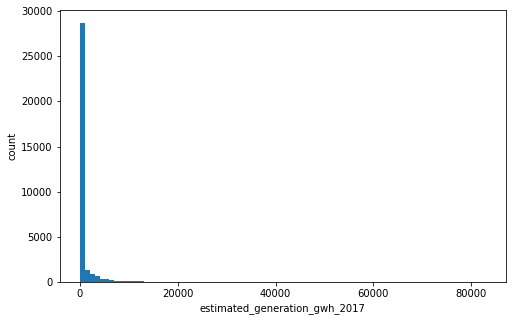

In [23]:
# start with a standard-scaled plot
histplot(power_plant_2017, 'estimated_generation_gwh_2017', 1000);

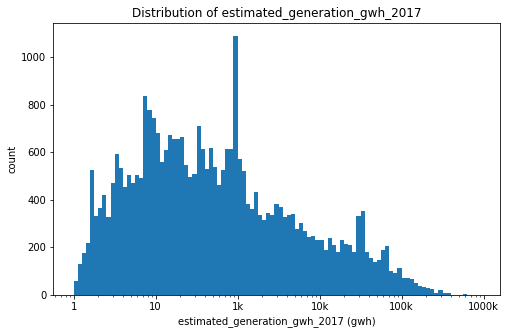

In [24]:
# there's a tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(power_plant_2017['estimated_generation_gwh_2017'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'estimated_generation_gwh_2017', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('estimated_generation_gwh_2017 (gwh)')
plt.ylabel('count')
plt.title('Distribution of estimated_generation_gwh_2017');
plt.show()

estimated_generation_gwh_2017 has a tailed distribution, so I used a log transformation on it. We can see the rightly-skewed distribution of the estimated_generation_gwh_2017 and that it is unimodal.

Next, let's look at the independent features: capacity_mw, fuel_type, and country.

3. capacity_mw

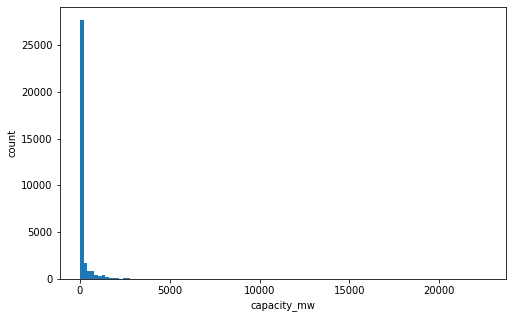

In [25]:
# start with a standard-scaled plot
histplot(power_plant_2017, 'capacity_mw', 200);

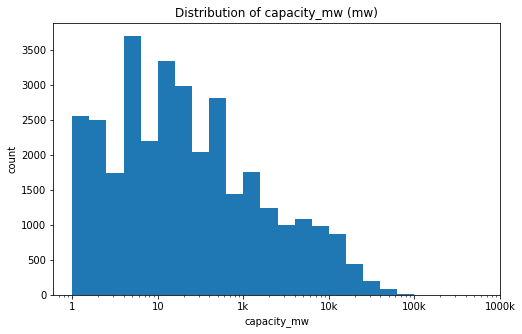

In [26]:
# there's a tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(power_plant_2017['capacity_mw'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'capacity_mw', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('capacity_mw')
plt.ylabel('count')
plt.title('Distribution of capacity_mw (mw)');
plt.show()

capacity_mw has a tailed distribution, so I used a log transformation on it. We can see the rightly-skewed distribution of the capacity_mw and that it is unimodal.

4 What primary_fuel is the most common?

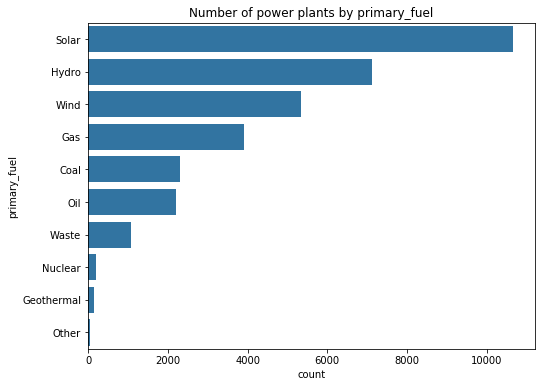

In [27]:
plt.figure(figsize = [8, 6])
color = sns.color_palette()[0]
order = power_plant_2017['primary_fuel'].value_counts().index
sns.countplot(data = power_plant_2017, y = 'primary_fuel', color = color, order = order);
plt.title('Number of power plants by primary_fuel');

Solar is the most common fuel for generating electricity among the power plants while Nuclear, Geothermal and Other are less common for generating electricity.

5. What country has the most number of power plants?

In [28]:
power_plant_2017['country'].nunique()

160

I'll be showing only the top ten countries with the most number of power plants for eassier analysis as the total number of countries is 160.

In [29]:
color = sns.color_palette()[0]
order = power_plant_2017['country'].value_counts()
top_country_by_count = list(order.index[:10])
top_country_by_count
#.plot(kind = 'bar', figsize = (20,8));

['United States of America',
 'China',
 'United Kingdom',
 'France',
 'Brazil',
 'India',
 'Germany',
 'Canada',
 'Spain',
 'Russia']

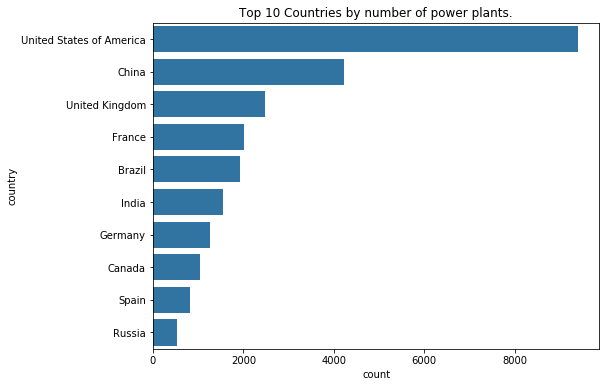

In [30]:
top_countries_by_total_plants = power_plant_2017[power_plant_2017.country.isin(['United States of America', 'China', 
                                                                                'United Kingdom', 'France', 'Brazil', 
                                                                                'India', 'Germany', 'Canada', 'Spain', 
                                                                                'Russia'])]

plt.figure(figsize = [8, 6])
color = sns.color_palette()[0]
order = top_countries_by_total_plants['country'].value_counts().index
sns.countplot(data = top_countries_by_total_plants, y = 'country', color = color, order = order);
plt.title('Top 10 Countries by number of power plants.');

The above plot shows the top 10 countries by number of power plants with the United States of America having the most number of power plants.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had to perform a log transformation on all the numerical features as they all had tails in their histogram distribution. After the log transformation, I discovered that all three numerical features capacity_mw, generation_gwh_2017, and estimated_generation_gwh_2017 have a rightly-skewed distribution and that they are all unimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the country feature distribution by number of power plants, because the number of countries is 160, so I had to show only the top ten countries. I did this by creating a new dataframe of the top ten countries by number of power plants.

## Bivariate Exploration

First, I'll be looking at the relationship between the numerical features.

1. What is the relationship between capacity_mw and generation_gwh_2017?

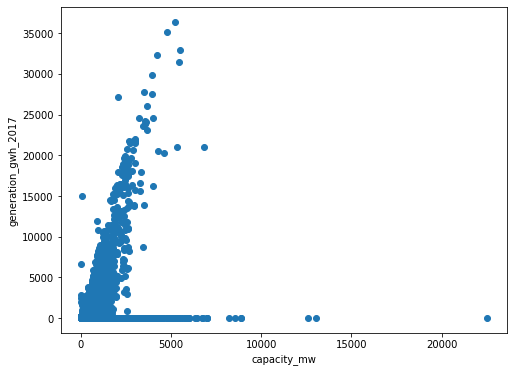

In [31]:
plt.figure(figsize = [8, 6])
plt.scatter(data = power_plant_2017, x = 'capacity_mw', y = 'generation_gwh_2017');
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2017');

There seems to be some positive correlation between the two features. For better proof of this, let's look at the relationship on the log transformation on both features.

In [32]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

power_plant_2017['log_capacity_mw'] = power_plant_2017['capacity_mw'].apply(log_trans)
power_plant_2017['log_generation_gwh_2017'] = power_plant_2017['generation_gwh_2017'].apply(log_trans)
power_plant_2017['log_estimated_generation_gwh_2017'] = power_plant_2017['estimated_generation_gwh_2017'].apply(log_trans)

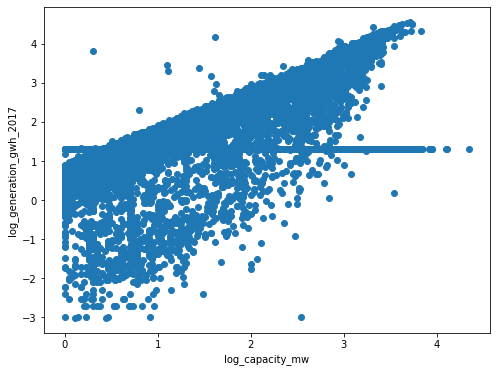

In [33]:
plt.figure(figsize = [8, 6])
plt.scatter(data = power_plant_2017, x = 'log_capacity_mw', y = 'log_generation_gwh_2017');
plt.xlabel('log_capacity_mw')
plt.ylabel('log_generation_gwh_2017');

We need to make this plot cleaner so the relationship can be seen even more clearly.

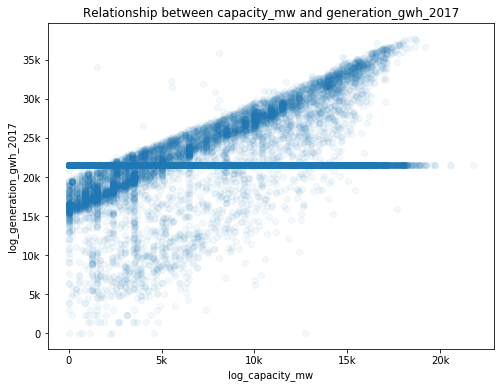

In [34]:
plt.figure(figsize = [8, 6])

sns.regplot(data = power_plant_2017, x = 'log_capacity_mw', y = 'log_generation_gwh_2017', scatter_kws = {'alpha': 1/20});
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-3, -2, -1, 0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k', '25k', '30k', '35k']);
plt.title('Relationship between capacity_mw and generation_gwh_2017');

Now, it is clear that there is indeed a positive correlation between both features. Also, there are some of the plots that form a straight line somewhere in the middle of the scatterplot.

2. What is the relationship between capacity_mw and estimated_generation_gwh_2017?

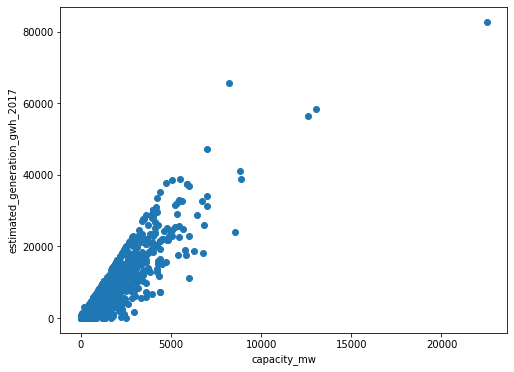

In [35]:
plt.figure(figsize = [8, 6])
plt.scatter(data = power_plant_2017, x = 'capacity_mw', y = 'estimated_generation_gwh_2017');
plt.xlabel('capacity_mw')
plt.ylabel('estimated_generation_gwh_2017');

The positive corelation is evident in the plot above. But, let's look deeper and see the relationship between both features after log transformation.

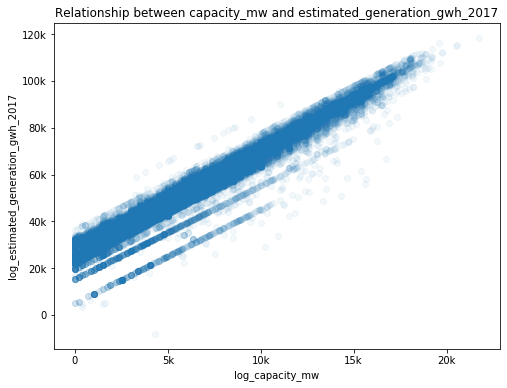

In [36]:
plt.figure(figsize = [8, 6])

sns.regplot(data = power_plant_2017, x = 'log_capacity_mw', y = 'log_estimated_generation_gwh_2017', 
            scatter_kws = {'alpha': 1/20});
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0, '20k', '40k', '60k', '80k', '100k', '120k']);
plt.title('Relationship between capacity_mw and estimated_generation_gwh_2017');

Now, it can clearly be seen that the correlation is actually a very strong positive correlation.

3. What relationship exists between generation_gwh_2017 and estimated_generation_gwh_2017?

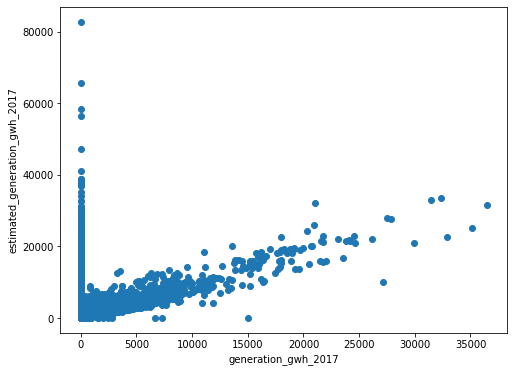

In [37]:
plt.figure(figsize = [8, 6])
plt.scatter(data = power_plant_2017, x = 'generation_gwh_2017', y = 'estimated_generation_gwh_2017');
plt.xlabel('generation_gwh_2017')
plt.ylabel('estimated_generation_gwh_2017');

There is a positive correlation but we need to further investigate the straight line of plots on the left side of the plot. Let's use the log transformation to investigate what might be going on there.

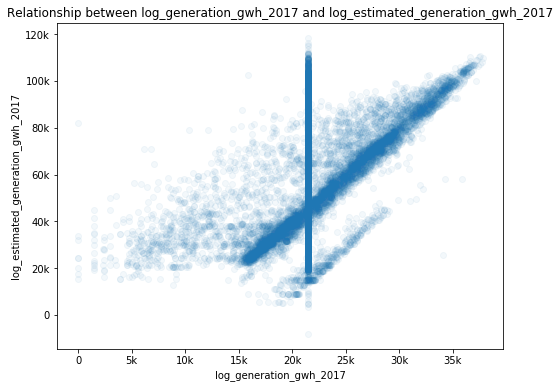

In [38]:
plt.figure(figsize = [8, 6])

sns.regplot(data = power_plant_2017, x = 'log_generation_gwh_2017', y = 'log_estimated_generation_gwh_2017', 
            scatter_kws = {'alpha': 1/20});
plt.xticks([-3, -2, -1, 0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k', '25k', '30k', '35k']);
plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0, '20k', '40k', '60k', '80k', '100k', '120k']);
plt.title('Relationship between log_generation_gwh_2017 and log_estimated_generation_gwh_2017');

The correlation is positive. Also, we can see the straight line of plots now in the middle of the plot(after log transformation).

Next, I'll be looking at what relationship exists between the numerical features and categorical features.

1. primary_fuel and the numerical features

In [39]:
numeric = ['log_capacity_mw', 'log_generation_gwh_2017', 'log_estimated_generation_gwh_2017']

Distribution of power plants by primary_fuel type and the numerical features.


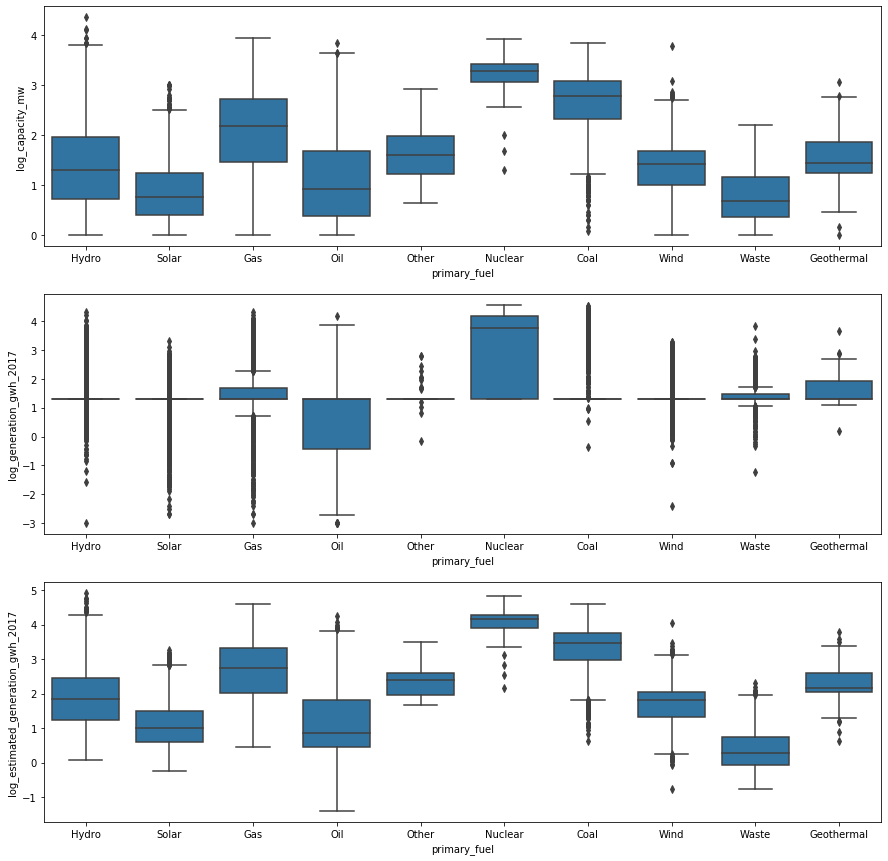

In [40]:
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [15, 15])
color = sns.color_palette()[0]

print('Distribution of power plants by primary_fuel type and the numerical features.')
for i in range(len(numeric)):
    var = numeric[i]
    sns.boxplot(data = power_plant_2017, x = 'primary_fuel', y = var, ax = ax[i], color = color)

plt.show()

Power plants that use 'Nuclear' as their primary fuel have the highest average capacity_mw followed by those that use 'Coal' while those that use 'Waste' as their primary fuel have the lowest average capacity_mw. Also, power plants that use 'Nuclear' as their primary fuel have the highest average estimated_generation_gwh_2017 followed by those that use 'Coal' while those that use 'Waste' have the lowest average estimated_generation_gwh_2017.

2. country and the numerical features. 

I'll be making use of the top ten countries  by number of power plants dataframe that I created earlier-- top_countries_by_total_plants

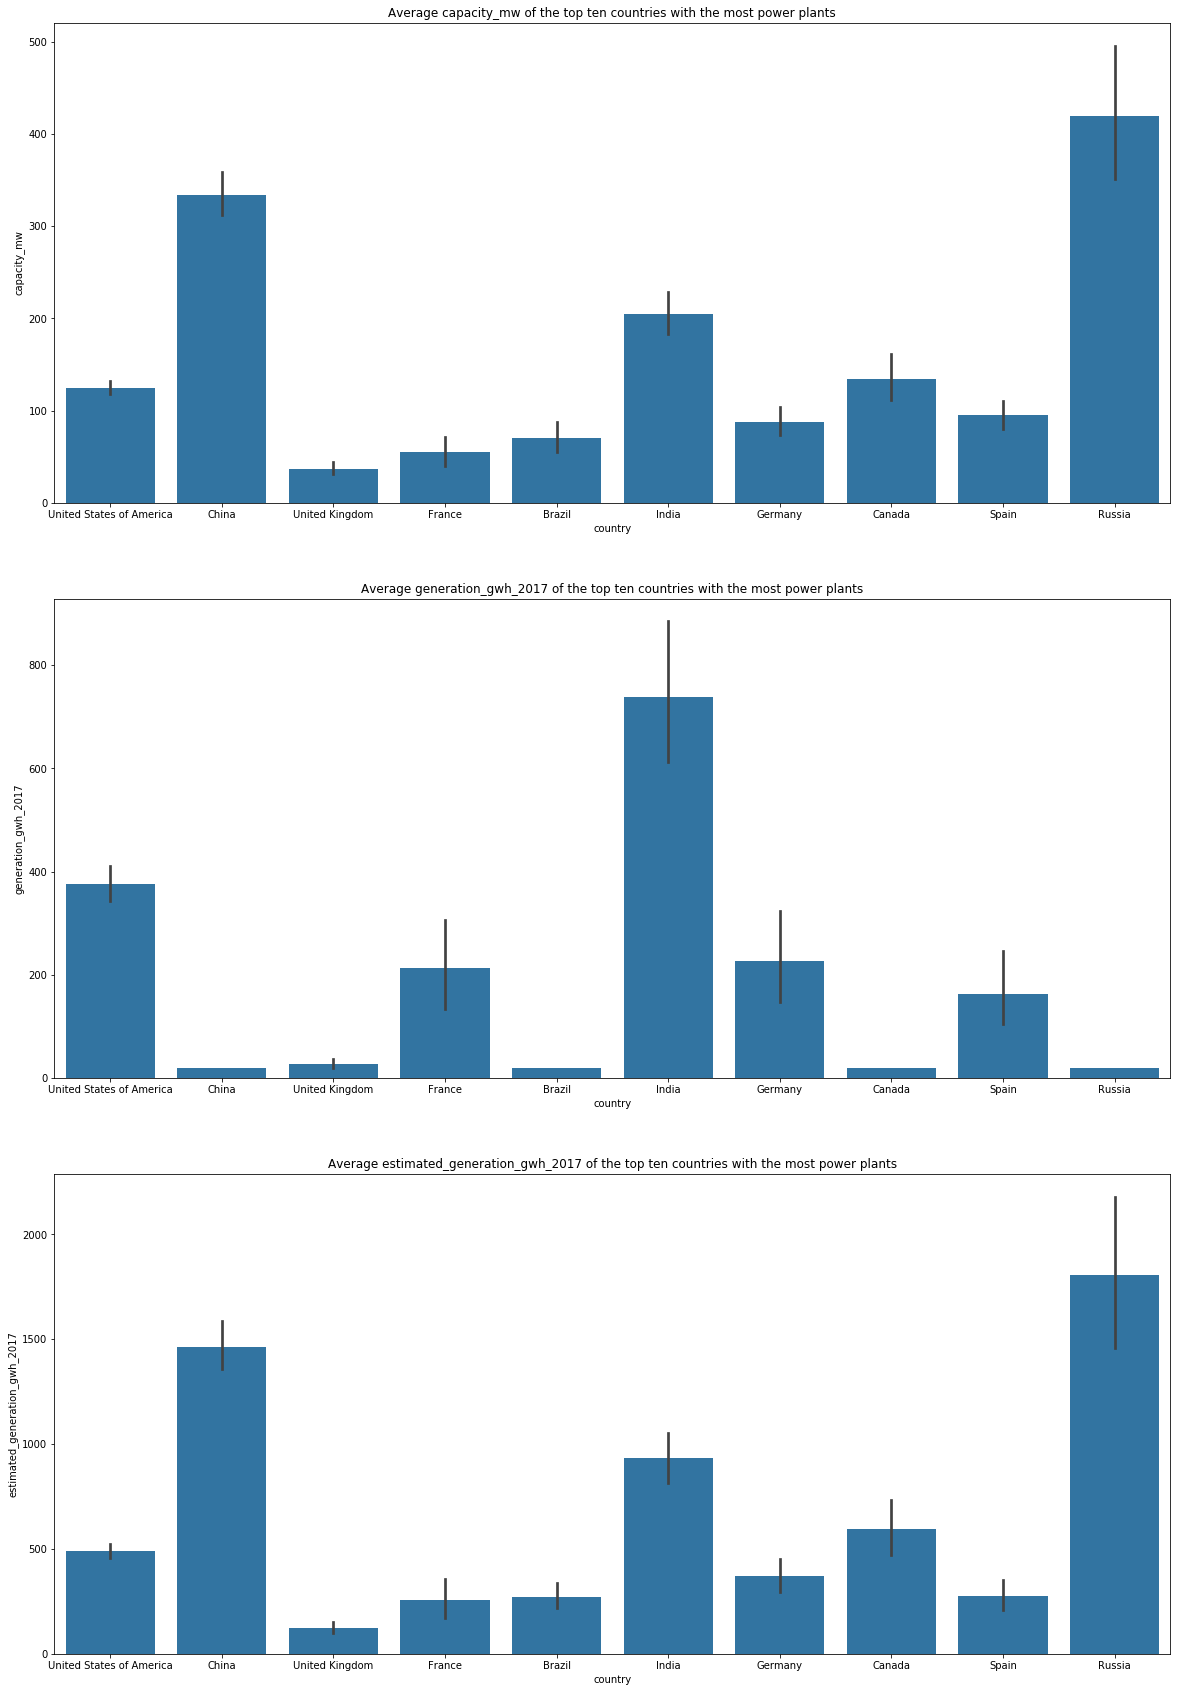

In [41]:
plt.figure(figsize = [20, 30])
order = top_countries_by_total_plants['country'].value_counts().index

plt.subplot(3, 1, 1)
sns.barplot(data = top_countries_by_total_plants, x = 'country', y = 'capacity_mw', color = color, order = order);
plt.title('Average capacity_mw of the top ten countries with the most power plants');

plt.subplot(3, 1, 2)
sns.barplot(data = top_countries_by_total_plants, x = 'country', y = 'generation_gwh_2017', color = color, order = order);
plt.title('Average generation_gwh_2017 of the top ten countries with the most power plants');

plt.subplot(3, 1, 3)
sns.barplot(data = top_countries_by_total_plants, x = 'country', y = 'estimated_generation_gwh_2017', color = color, 
           order = order);
plt.title('Average estimated_generation_gwh_2017 of the top ten countries with the most power plants');

Apparently, total number of power plants by country does not in any way influence capacity_mw, generation_gwh_2017, and estimated_generation_gwh_2017. For the three numeric features, it can be seen that though the United States of America has the most number of power plants, the average capacity_mw, average generation_gwh_2017 and average estimated_generation_gwh_2017 is low compared to Russia which fares better in both average capacity_mw and average estimated_generation_gwh_2017, India which fares better in the average of all three numeric features and China which fares better in both average capacity_mw and average estimated_generation_gwh_2017.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  I discovered that power plants that use 'Nuclear' as their primary fuel have the highest average estimated_generation_gwh_2017 followed by those that use 'Coal' while those that use 'Waste' have the lowest average estimated_generation_gwh_2017

> I also noticed that total number of power plants by country does not in any way influence generation_gwh_2017, and estimated_generation_gwh_2017. While United States of America has the most number of power plants, its average generation_gwh_2017 and average estimated_generation_gwh_2017 is low compared to Russia which fares better in average estimated_generation_gwh_2017, India which fares better in both average generation_gwh_2017 and average estimated_generation_gwh_2017 and China which fares better in average estimated_generation_gwh_2017.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I discovered that power plants that use 'Nuclear' as their primary fuel have the highest average capacity_mw followed by those that use 'Coal' while those that use 'Waste' as their primary fuel have the lowest average capacity_mw.

> I also observed that number of power plants by country has no influence on average capacity_mw. United States of America has a low average capacity_mw for a country with the most number of power plants while Russia with a much smaller number of power plants when compared to the United States of America has a rather impressive average capacity_mw.

## Multivariate Exploration

Relationship between log_capacity_mw and log_estimated_generation_gwh_2017 across primary_fuel types.


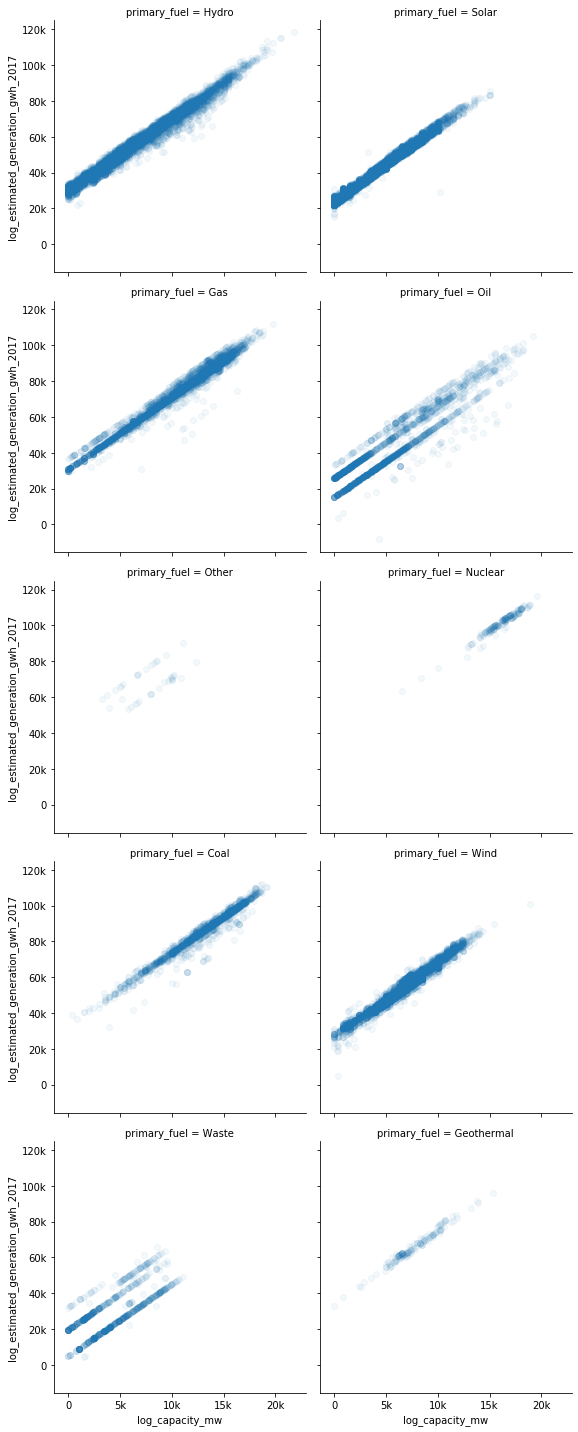

In [42]:
g = sns.FacetGrid(data = power_plant_2017, col = 'primary_fuel', size = 4, col_wrap = 2)
g.map(plt.scatter, 'log_capacity_mw', 'log_estimated_generation_gwh_2017', 
            alpha = 1/20);
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0, '20k', '40k', '60k', '80k', '100k', '120k']);
print('Relationship between log_capacity_mw and log_estimated_generation_gwh_2017 across primary_fuel types.')

From the above plot, we can conclude that the positive correlation between capacity_mw and log_estimated_generation_gwh_2017 is true for all fuel types.

In [43]:
top_countries_by_total_plants['log_capacity_mw'] = top_countries_by_total_plants['capacity_mw'].apply(log_trans)
top_countries_by_total_plants['log_generation_gwh_2017'] = top_countries_by_total_plants['generation_gwh_2017'].apply(log_trans)
top_countries_by_total_plants['log_estimated_generation_gwh_2017'] = top_countries_by_total_plants['estimated_generation_gwh_2017'].apply(log_trans)

Relationship between log_capacity_mw and log_estimated_generation_gwh_2017 across country.


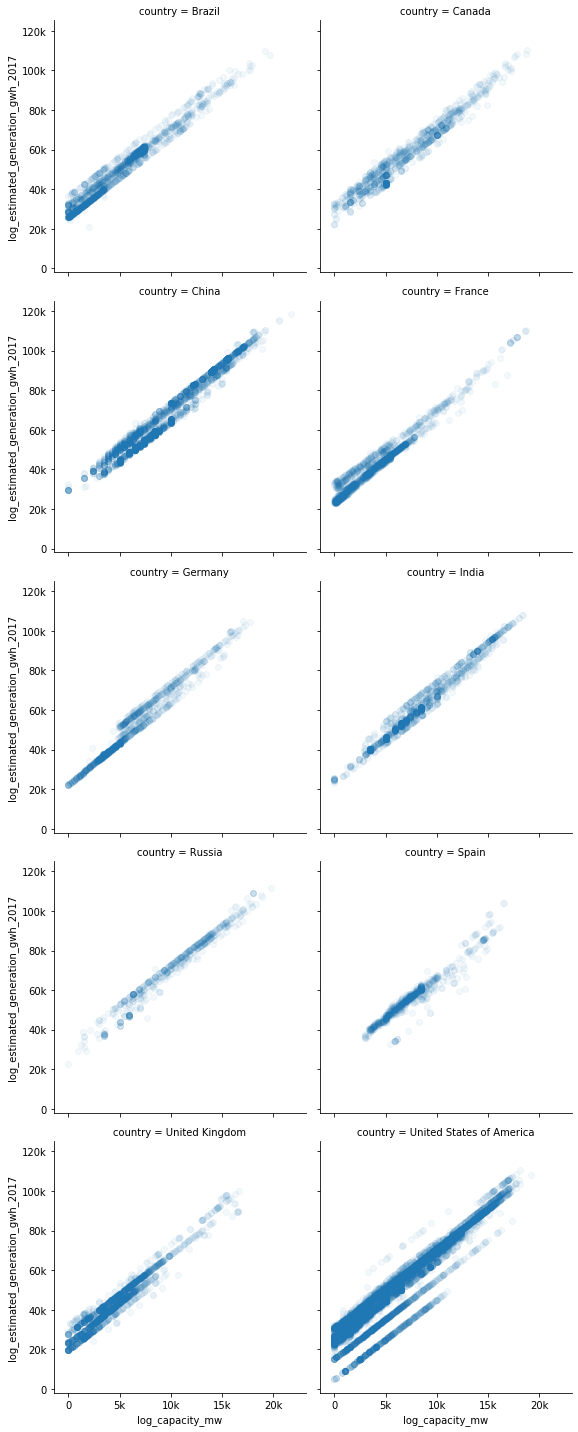

In [44]:
g = sns.FacetGrid(data = top_countries_by_total_plants, col = 'country', size = 4, col_wrap = 2)
g.map(plt.scatter, 'log_capacity_mw', 'log_estimated_generation_gwh_2017', 
            alpha = 1/20);
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0, '20k', '40k', '60k', '80k', '100k', '120k']);
print('Relationship between log_capacity_mw and log_estimated_generation_gwh_2017 across country.')

From the above plot, we can conclude that the positive correlation between capacity_mw and log_estimated_generation_gwh_2017 is true for the top ten countries by number of power plants.

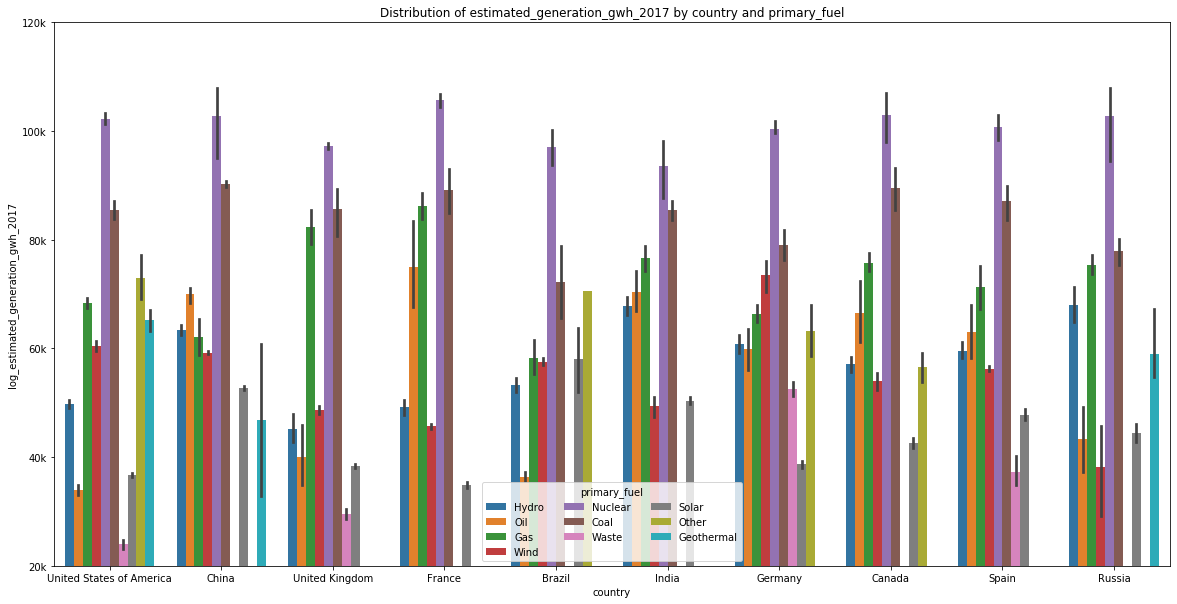

In [45]:
plt.figure(figsize = [20, 10])
order = top_countries_by_total_plants['country'].value_counts().index

sns.barplot(data = top_countries_by_total_plants, x = 'country', y = 'log_estimated_generation_gwh_2017', 
              hue = 'primary_fuel', order = order);
plt.yticks([0, 1, 2, 3, 4, 5], ['20k', '40k', '60k', '80k', '100k', '120k']);
plt.legend(loc = 8, ncol = 3, title = 'primary_fuel');
plt.title('Distribution of estimated_generation_gwh_2017 by country and primary_fuel');

From the barplot above, we can easily see that power plants using Nuclear primary_fuel have the highest estimated_generation_gwh_2017 and that power plants using Waste as their primary_fuel, have the lowest average estimated_generation_gwh_2017. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I was able to see that the positive correlation between capacity_mw and estimated_generation_gwh_2017 remained true for all primary_fuel types. This was same for the top 10 countries by number of powerplants.

> I also saw that power plants that made use of Nuclear as primary_fuel had the highest estimated_generation_gwh_2017 on average for all top 10 countries by number of power plants.

### Were there any interesting or surprising interactions between features?

> There were no surprising interactions between features. The plots only strengthened what has been discovered earlier in the analysis.

## Conclusions
- There is a stronger relationship between capacity_mw and estimated_generation_gwh_2017 for all primary_fuel types as well as for the top 10 countries by number of power plants.
- Power plants that make use of Nuclear primary_fuel have the highest capacity_mw and estimated_generation_gwh_2017 on average.
- There is no correlation between number of power plants per country and average capacity_mw. The determining factor for high average capacity_mw and estimated_generation_gwh_2017 is majorly the type of fuel used in the power plants.
- Unsuprisingly, the country where power plant is located has no influence on the capacity_mw and estimated_generation_gwh_2017.